In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [9]:
print(df.describe());

           Height    Weight        Age     Gender
count   10.000000  10.00000  10.000000  10.000000
mean   168.700000  64.00000  27.700000   0.500000
std      7.439385   7.60117   4.762119   0.527046
min    158.000000  54.00000  21.000000   0.000000
25%    162.750000  58.25000  24.250000   0.000000
50%    169.000000  63.50000  27.500000   0.500000
75%    174.250000  69.50000  31.500000   1.000000
max    180.000000  75.00000  35.000000   1.000000


In [20]:
x = df.drop("Gender", axis=1);
print(df);
y = df["Gender"];

scaler = StandardScaler();
xScaled = scaler.fit_transform(df);

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [25]:
pca = PCA(n_components=2);
xPca = pca.fit_transform(xScaled);

X_train, X_test, y_train, y_test = train_test_split(xPca, y, test_size=0.3, random_state=42);

model = LogisticRegression();
model.fit(X_train, y_train);

y_pred = model.predict(X_test);
print(y_pred);

[0 0 1]


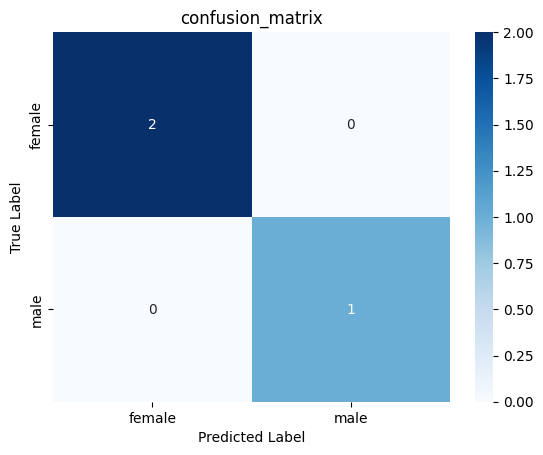

In [27]:
cm = confusion_matrix(y_test, y_pred);

plt.Figure(figsize=(5,4));
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['female', 'male'], yticklabels=['female','male']);
plt.xlabel('Predicted Label');
plt.ylabel('True Label');
plt.title('confusion_matrix');
plt.show();

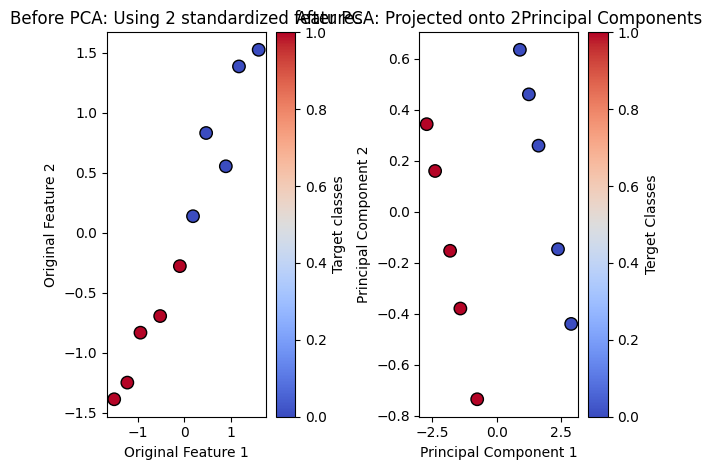

In [32]:
y_numeric = pd.factorize(y)[0];

plt.Figure(figsize=(12, 5));

plt.subplot(1, 2, 1);
plt.scatter(xScaled[:, 0], xScaled[:, 1], c = y_numeric, cmap='coolwarm', edgecolors='k', s=80);
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using 2 standardized features');
plt.colorbar(label='Target classes');

plt.subplot(1, 2, 2);
plt.scatter(xPca[:, 0], xPca[:, 1], c = y_numeric, cmap='coolwarm', edgecolors='k', s = 80);
plt.xlabel('Principal Component 1');
plt.ylabel('Principal Component 2');
plt.title('After PCA: Projected onto 2Principal Components');
plt.colorbar(label='Terget Classes');

plt.tight_layout();
plt.show();
